In [1]:
import numpy as np
from scipy.stats import norm
import struct
from math import *

In [2]:
def fvecs_read(filename, c_contiguous=True):
    fv = np.fromfile(filename, dtype=np.float32)
    if fv.size == 0:
        return np.zeros((0, 0))
    dim = fv.view(np.int32)[0]
    assert dim > 0
    fv = fv.reshape(-1, 1 + dim)
    if not all(fv.view(np.int32)[:, 0] == dim):
        raise IOError("Non-uniform vector sizes in " + filename)
    fv = fv[:, 1:]
    if c_contiguous:
        fv = fv.copy()
    return fv

In [5]:
data = fvecs_read('/media/mydrive/ann-codes/in-memory/EXPERIMENTS/hepmass/hepmass_data.fvecs')


In [4]:
kernels = fvecs_read("eigenvalues/hepmass_kernels.fvecs")

In [45]:
max_vals

array([ 4.37828159,  2.36529636,  1.73236978,  4.14802265,  1.7319783 ,
        4.48261786,  3.93391538,  2.75859022,  1.73145008,  0.75426072,
        4.63933516,  2.60229445,  1.73200655,  0.86064863,  5.73173523,
        2.43836856,  1.73273754,  1.22633111,  5.86636686,  2.28221679,
        1.73273993,  1.74312329,  7.29342031,  9.35725307, 15.55812836,
        5.27731323,  4.61318254])

In [14]:
min_vals = np.zeros(data.shape[1])
max_vals = np.zeros(data.shape[1])
for i in range(data.shape[1]):
    min_vals[i] = np.min(data[:,i])
    max_vals[i] = np.max(data[:,i])

In [46]:
np.mean(data,axis=1)

array([-0.13756947, -0.39660752, -0.41673905, ...,  0.10477781,
       -0.09775864, -0.06772137], dtype=float32)

In [18]:
gtfile = "/media/mydrive/ann-codes/in-memory/EXPERIMENTS/hepmass/hepmass_gnd.txt"
result = []
with open(gtfile, "r") as fin:
    for line in fin.readlines()[1:]:
        line_s = [int(x) for x in line.split()[1:51]]
        line_s.sort()
        result.append(line_s)


In [21]:
def gt_read(filename):
    fv = np.fromtxt(filename, dtype=np.int32)
    if fv.size == 0:
        return np.zeros((0, 0))
    dim = fv[0]
    assert dim > 0
    fv = fv.reshape(-1, 1 + dim)
    fv = fv[:, 1:]
    return fv

In [14]:
a = [1,2,3,4,5,43,2,3,4]
a.sort(), a

(None, [1, 2, 2, 3, 3, 4, 4, 5, 43])

In [24]:
for i in range(queries.shape[0]):
    query_new[i] = queries[i]-median_vals

In [25]:
def to_fvecs(filename, data):
    with open(filename, 'wb') as fp:
        for y in data:
            d = struct.pack('I', y.size)	
            fp.write(d)
            for x in y:
                a = struct.pack('f', x)
                fp.write(a)

In [28]:
to_fvecs('hepmass/hepmass_data_shift.fvecs',data_new)

In [29]:
to_fvecs('hepmass/hepmass_queries_shift.fvecs',query_new)

In [39]:
norms = []
for i in range(data_new.shape[0]):
    norms.append(norm(data[i]))

In [40]:
norms = np.array(norms)

In [47]:
np.min(norms)**2

7.640909568438531

In [6]:
data[0]

array([-0.89466774, -0.09673052, -0.32803825, -1.0413734 ,  0.94685996,
       -1.0542208 , -1.3889791 ,  2.1153617 , -1.0265902 ,  0.7542607 ,
       -0.85001504,  1.1747456 ,  0.67547923,  0.86064863, -1.8324926 ,
        2.297373  ,  1.3219651 , -0.8154401 , -1.1588753 ,  0.7852737 ,
       -1.5245442 , -0.5736825 , -0.67298776, -1.2209444 , -0.32647082,
        0.6945014 , -0.5347921 ], dtype=float32)

In [9]:
data[9999999]

array([ 0.92586964, -1.0047346 ,  1.603905  ,  0.50205415, -1.6004517 ,
       -0.00598356, -0.4449331 , -0.5952034 , -0.38873786,  0.7542607 ,
       -0.8215476 ,  0.20731243, -0.36900055, -1.1619147 , -0.42505848,
        0.6127136 ,  0.14904861, -0.8154401 ,  0.03102885,  2.1990516 ,
        0.96908903, -0.5736825 , -0.62716657, -0.24764247, -0.28888276,
       -1.1402473 ,  0.7278169 ], dtype=float32)

In [55]:
-0.894668       -0.0967305      -0.328038       -1.04137        0.94686 -1.05422        -1.38898        2.11536 -1.02659        0.754261 -0.850015       1.17475 0.675479        0.860649        -1.83249        2.29737 1.32197 -0.81544        -1.15888        0.785274 -1.52454        -0.573682       -0.672988       -1.22094        -0.326471       0.694501        -0.534792
-0.0489761      0.796555        -0.591829       -0.432567       0.871642        -1.05422        -1.8341 -1.03732        -0.818911-1.3258 -1.34772        0.329108        0.965478        0.860649        -1.09784        -1.74592        -1.66877        1.22633 -0.815118        -0.459886       0.0666335       -0.573682       -0.733975       -0.665127       1.06516 0.35225 -0.990444
0.572581        0.528258        -0.340759       1.09702 0.0125966       -0.00598356     1.81088 -0.755018       1.57269 0.7542611.18748  1.00107 -0.290104       0.860649        0.223914        -1.88627        0.077578        -0.81544        0.218231        0.495875 0.101177        -0.573682       0.181036        0.732119        -0.299096       2.2045  1.59769
0.92587 -1.00473        1.6039  0.502054        -1.60045        -0.00598356     -0.444933       -0.595203       -0.388738       0.754261 -0.821548       0.207312        -0.369001       -1.16191        -0.425058       0.612714        0.149049        -0.815440.0310288        2.19905 0.969089        -0.573682       -0.627167       -0.247642       -0.288883       -1.14025        0.727817


13.53633739597253

In [57]:
450671  688469  846183  941316  1033803 1242410 1510096 2478181 2490507 2499170 2570057 3468143 3546744 3710439 3786030  4224250 4249260 4304977 4444608 4498938 4521367 4538645 4610440 4648022 4975039 5052975 5143639 5175277 5571546  5791497 5920665 6030480 6377110 6631454 6634257 7355742 7652973 7870107 8366126 8378887 8539147 8631250 8704720  8740536 9142313 9202977 9241284 9466988 9588437 9854949
31701   66913   169619  304034  580791  633722  694287  737010  804394  1003148 1191803 1346288 1541864 1788627 1921039  2228258 2305456 2342659 2354638 2410455 2470927 2781129 3467020 3565173 3798959 4141264 4216972 4345372 4419068  4577744 4847611 5102543 5192702 5414705 5459304 5730532 5827938 6078332 6300570 6594069 6665054 6857621 7169881  7191036 7460555 7594555 8841343 9255253 9298098 9532865
209860  447840  890356  1021374 1088617 1225773 1249704 1392988 1638671 1738559 2081048 2202125 2256794 2392247 2650636  2726515 2848022 2933023 2933921 3062303 3085262 3158070 3428642 3868789 3916283 4600856 4633655 4915775 5071479  5513210 5677797 6019891 6070151 6219782 6419469 6637277 7022959 7184237 7686611 7740803 7980984 8240892 8526990  8596487 8782603 8829853 9183711 9228421 9514582 9932234

16.37896824912676

In [21]:
result[49]

[209860,
 447840,
 890356,
 1021374,
 1088617,
 1225773,
 1249704,
 1392988,
 1638671,
 1738559,
 2081048,
 2202125,
 2256794,
 2392247,
 2650636,
 2726515,
 2848022,
 2933023,
 2933921,
 3062303,
 3085262,
 3158070,
 3428642,
 3868789,
 3916283,
 4600856,
 4633655,
 4915775,
 5071479,
 5513210,
 5677797,
 6019891,
 6070151,
 6219782,
 6419469,
 6637277,
 7022959,
 7184237,
 7686611,
 7740803,
 7980984,
 8240892,
 8526990,
 8596487,
 8782603,
 8829853,
 9183711,
 9228421,
 9514582,
 9932234]

In [59]:
np.min(norms)**2*(1.21**6)

23.98044741354649

In [60]:
np.min(norms)**2*(1.21**7)

29.016341370391252

In [61]:
np.min(norms)**2*(1.21**8)

35.10977305817341

In [62]:
np.min(norms)**2*(1.21**9)

42.48282540038983

In [73]:
np.percentile(norms,90)**2

38.87754748561039

In [74]:
distances = np.loadtxt("result_distances.txt")

In [75]:
distances.shape

(1000, 3)

In [77]:
distances = distances.reshape((100,10,3))

In [93]:
def gen_avg_distances(distances,k):
    avg_distances = np.zeros(distances.shape[1])
    for i in range(distances.shape[1]):
        avg_distances[i] = np.mean(distances[:,i,k])
    return avg_distances

In [97]:
near_dis = gen_avg_distances(distances,0)

In [98]:
far_dis = gen_avg_distances(distances,1)

In [123]:
def gen_widths(near_dis,far_dis):
    width = np.zeros(near_dis.shape[0])
    for i in range(near_dis.shape[0]):
        probs = []
        for w in np.arange(1,10,0.05):
            probs.append(log(1/gen_pro_gauss(near_dis[i],w))/log(1/gen_pro_gauss(far_dis[i],w)))
        
        probs = np.array(probs)
        width[i] = 1+ 0.05*np.argmin(probs)
    return width

In [124]:
gen_widths(near_dis,far_dis)

array([6.15, 6.1 , 6.05, 6.  , 5.95, 5.9 , 5.9 , 5.85, 5.85, 5.45])

In [120]:
log(1/gen_pro_gauss(5.59309409,6.15))/log(1/gen_pro_gauss(6.08832809,6.15))

0.9515694253132632

In [129]:
distances[-1]

array([[5.71328766, 6.14544642, 6.58403447],
       [5.34304696, 6.05422351, 6.71027506],
       [5.19003638, 5.9474021 , 6.77842015],
       [4.99153281, 5.84792997, 6.84114919],
       [4.91599461, 5.77355242, 6.8232917 ],
       [4.88412192, 5.7147323 , 6.75983445],
       [4.85324555, 5.67296912, 6.73220515],
       [4.87661865, 5.65981471, 6.71358534],
       [4.93959825, 5.66166431, 6.60268881],
       [4.65183481, 4.73284051, 5.09638165]])

In [63]:
np.max(norms)**2

558.1427879354451

In [33]:
np.min(norms)

4.015153557172142

In [34]:
np.max(norms)

21.559872096644945

(array([1., 0., 1., ..., 0., 0., 1.]),
 array([ 2.7642195,  2.7663057,  2.7683916, ..., 23.620874 , 23.62296  ,
        23.625046 ], dtype=float32),
 <BarContainer object of 10000 artists>)

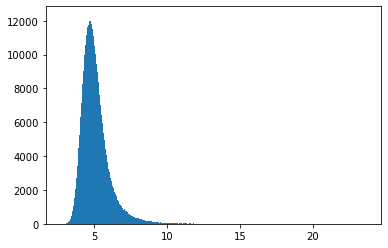

In [56]:
plt.hist(norms,bins = 10000)

In [9]:
dataset = "siftC"
raw_file = config["data filename"]
print("Reading data...")
data = fvecs_read(raw_file).astype(np.float64)
print("Read data: ", data.shape)
query_file = config["query filename"]
queries = fvecs_read(query_file)
print("Read queries: ", queries.shape)
kernel_file = config["kernel filename"]
kernels = fvecs_read(kernel_file)
qn = config["testing size"]
kernels = kernels.reshape((qn, dim, dim)).astype(np.float64)
print("Read kernels: ", kernels.shape)

hash_table_paras = config["hash table parameters"]
partitions = [sqrt(pp["upper"]) for pp in hash_table_paras]
partitions = np.array(partitions)
num_partitions = len(partitions)
alpha_rot = np.array(partitions) / dimP2 ** (1/6)

n = data.shape[0]

NameError: name 'config' is not defined

In [13]:
kernels = fvecs_read("eigenvalues/hepmass_kernels.fvecs")

In [ ]:

alpha_rot = np.array(partitions) / dimP2 ** (1/6)

In [84]:
def gen_pro_gauss(s,w):
    s = sqrt(s)
    return 1-2*norm.cdf(-w/s)-2/(sqrt(2*pi)*w/s)*(1-exp(-(w*w/(2*(s*s)))))

In [31]:
norm(queries[20])

5.1830497

In [21]:
kernels.shape

(2700, 27)

In [18]:
kernels[17]@queries[17]

1.2386227